# Spotify Track Danceability Predictor

## 1. Installing required modules

In [1]:
! pip install scikit-learn 
! pip install pandas
! pip install numpy
! pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 2. Importing required modules

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 3. Loading Top_Spotify_Tracks_of_2019 dataset

In [4]:
df = pd.read_csv("D:\\Workspace\\Project\\Spotify-Track-Danceability-Predictor\\Top_Spotify_Tracks_of_2019.csv")

## 3. Examine the dataset

In [5]:
print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nSample data:")
print(df.head())

Dataset shape: (50, 16)

Columns: ['id', 'name', 'artists', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']

Sample data:
                      id                                           name  \
0  6v3KW9xbzN5yKLt9YKDYA                                       Señorita   
1  2Fxmhks0bxGSBdJ92vM42                                        bad guy   
2  0RiRZpuVRbi7oqRdSMwhQ  Sunflower - Spider-Man: Into the Spider-Verse   
3  6ocbgoVGwYJhOv1GgI9Ns                                        7 rings   
4  2YpeDb67231RjR0MgVLzs                          Old Town Road - Remix   

         artists  danceability  energy  key  loudness  mode  speechiness  \
0   Shawn Mendes         0.759   0.548  9.0    -6.049   0.0       0.0290   
1  Billie Eilish         0.701   0.425  7.0   -10.965   1.0       0.3750   
2    Post Malone         0.755   0.522  2.0    -4.368   1.0       0.0575   
3 

## 4. Creating a target variable

In [6]:
danceability_threshold = df['danceability'].median()
df['danceability_category'] = np.where(df['danceability'] >= danceability_threshold, 'High', 'Low')

print(f"\nDanceability threshold (median): {danceability_threshold}")
print(df['danceability_category'].value_counts())


Danceability threshold (median): 0.743
danceability_category
High    25
Low     25
Name: count, dtype: int64


## 5. Selecting music features

In [7]:
X = df[['energy', 'loudness', 'speechiness', 'acousticness', 
        'instrumentalness', 'liveness', 'valence', 'tempo']]
y = df['danceability_category']

## 6. Preprocessing - Scale the features

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 7. Train-test split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## 8. Training model

In [10]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 9.  Model evaluation

In [11]:

y_pred = clf.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Classification Report:
              precision    recall  f1-score   support

        High       0.50      0.25      0.33         4
         Low       0.62      0.83      0.71         6

    accuracy                           0.60        10
   macro avg       0.56      0.54      0.52        10
weighted avg       0.57      0.60      0.56        10

Accuracy: 0.60


## 10. Feature importance

In [12]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': clf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
            Feature  Importance
1          loudness    0.181674
6           valence    0.154544
2       speechiness    0.146036
0            energy    0.142669
3      acousticness    0.120192
5          liveness    0.114979
7             tempo    0.090515
4  instrumentalness    0.049390


## 11. Predicting and Visualising 


Predictions for the first 5 songs:
Señorita by Shawn Mendes
  Actual danceability: 0.759 (High)
  Predicted category: High
bad guy by Billie Eilish
  Actual danceability: 0.701 (Low)
  Predicted category: Low
Sunflower - Spider-Man: Into the Spider-Verse by Post Malone
  Actual danceability: 0.755 (High)
  Predicted category: High
7 rings by Ariana Grande
  Actual danceability: 0.778 (High)
  Predicted category: High
Old Town Road - Remix by Lil Nas X
  Actual danceability: 0.878 (High)
  Predicted category: High


<Figure size 1200x600 with 0 Axes>

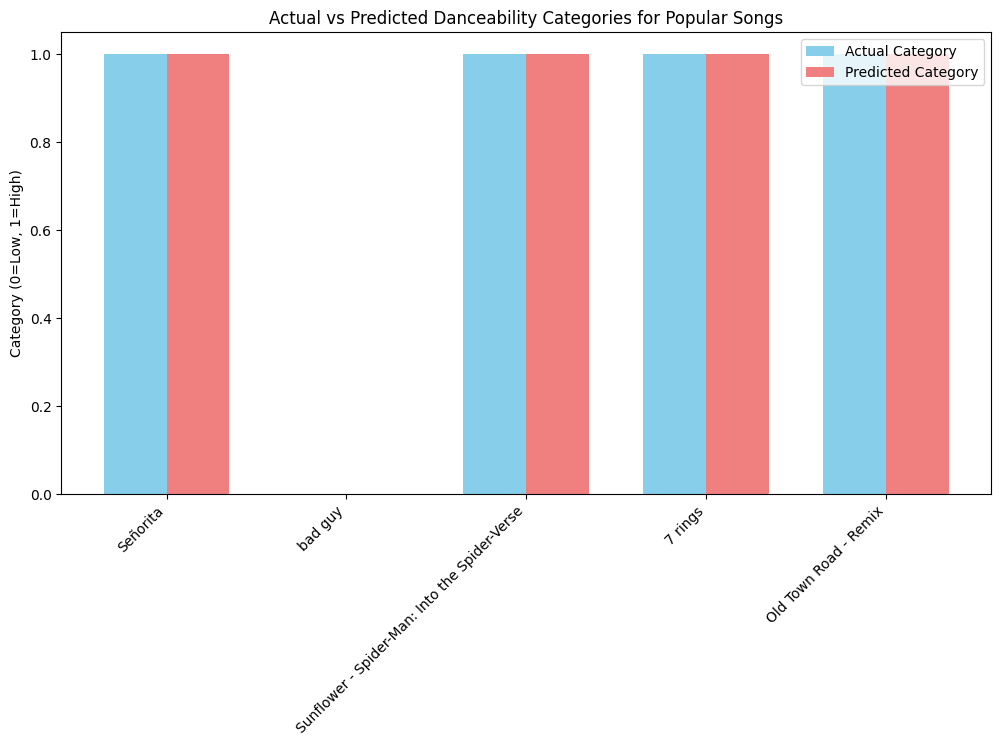

In [13]:
print("\nPredictions for the first 5 songs:")
example_songs = df.iloc[:5][['name', 'artists', 'danceability', 'danceability_category']]
example_features = X_scaled[:5]
example_predictions = clf.predict(example_features)

for i, (_, row) in enumerate(example_songs.iterrows()):
    print(f"{row['name']} by {row['artists']}")
    print(f"  Actual danceability: {row['danceability']:.3f} ({row['danceability_category']})")
    print(f"  Predicted category: {example_predictions[i]}")

plt.figure(figsize=(12, 6))
song_names = example_songs['name'].values
dance_values = example_songs['danceability'].values
pred_values = np.array([1 if p == 'High' else 0 for p in example_predictions])
actual_values = np.array([1 if a == 'High' else 0 for a in example_songs['danceability_category']])

x = np.arange(len(song_names))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width/2, actual_values, width, label='Actual Category', color='skyblue')
ax.bar(x + width/2, pred_values, width, label='Predicted Category', color='lightcoral')

ax.set_ylabel('Category (0=Low, 1=High)')
ax.set_title('Actual vs Predicted Danceability Categories for Popular Songs')
ax.set_xticks(x)
ax.set_xticklabels(song_names, rotation=45, ha='right')
ax.legend()